# Основе обраде и приказа табеларних података

Обраду, анализу и графички приказ података је тешко раздвојити. Све то углавном иде паралелно. У Пајтону постоји неколико најчешће коришћених библиотека које су усаглашене тако да објекти које користимо за обраду података имају функције за цртање, а функције за цртање враћају табеле и серије. Зато је то овде једна лекција.

## Обрада табеларних података

Много тога за шта су нам потребни програмерско знање и труд при обради података у листама постаје једноставна примена готових функција када податке спакујемо у _DataFrame_. Библиотека _pandas_ омогућава да рад са табелама буде једноставан, брз и ефикасан. 

### Учитавање табеле из датотеке

Податке најчешће чувамо у табелама. Чак су и базе података само колекције различитих табела. За поновну употребу табеле снимамо у датотеке (или фајлове, како их понекад зовемо). Те снимљене табеле касније учитавамо по потреби. Уобичајени формат датотека за снимање табела је CSV (енгл. _comma separated value_, тј. вредности одвојене зарезом). Библиотека _pandas_ има функције за учитавање и снимање табела. За учитавање користимо функцију `pd.read_csv()`. Aргумент ове функције је стринг са локацијом и називом датотеке, нпр. "data/countries.csv". Ова датотека се не налази у Пајтоновом радном директоријуму већ у поддиректоријуму _data_, због чега је потребно да то напишемо и да назив директоријума и датотеке раздвојимо косом цртом. Учитаћемо сада баш ту датотеку.  

In [1]:
import pandas as pd                # prvo uvozimo pandas biblioteku
import matplotlib.pyplot as plt    # i biblioteku za crtanje grafika

In [2]:
dt = pd.read_csv('data/countries.csv')

При позивању функција из одређене библиотеке потребно је да наведемо ознаке библиотека. Зато није довољно да напишемо `read_csv()` већ морамо `pd.read_csv()`. При увожењу библиотека ми смо нагласили да ћемо користити скраћена имена уместо пуних. Користићемо `pd` уместо `pandas` и `plt` уместо `matplotlib.pyplot` што ће нам олакшати писање кôда.

Садржај датотеке смо учитали и сместили у табелу (тачније променљиву типа _dataframe_) `dt`. Да бисмо видели шта је учитано, згодно је да прикажемо на екрану заглавље те табеле са првих неколико редова. За то нам служи функција `.head()`.

In [3]:
dt.head()

,Country,Continent,Population,Area
0,Afghanistan,Asia,31056997,647500
1,Albania,Europe,3581655,28748
2,Algeria,Africa,32930091,2381740
3,American Samoa,Oceania,57794,199
4,Andorra,Europe,71201,468


Видимо да су државе наведене по редовима, а да по колонама имамо основне податке о тим државама. У колони _Country_ је име државе, _Continent_ означава континент на ком се налази, _Population_ број становника, а _Area_ површину државе у квадратним километрима. Називе свих колона можемо да добијемо помоћу `dt.columns`.

In [4]:
dt.columns

Index(['Country', 'Continent', 'Population', 'Area'], dtype='object')

Вредности које се налазе у одређеној колони се позивају тако што после имена табеле у угластим заграда наведемо име колоне под једноструким или двоструким наводницима. Да бисмо приказали колону са именима држава, написаћемо `dt['Country']` или `dt["Country"]`.

In [5]:
dt['Country']

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
222         West Bank
223    Western Sahara
224             Yemen
225            Zambia
226          Zimbabwe
Name: Country, Length: 227, dtype: object

Ако хоћете да видите само део ове листе, користите слајсове. Са `[:10]` ћете нпр. добити првих 10, а са `[10:20]` других 10 елемената колоне.

In [6]:
dt['Country'][10:20]

10           Aruba
11       Australia
12         Austria
13      Azerbaijan
14    Bahamas, The
15         Bahrain
16      Bangladesh
17        Barbados
18         Belarus
19         Belgium
Name: Country, dtype: object

### Сортирање

Библиотека _pandas_ има прегршт корисних функција за рад са табелама и њиховим колонама. Функција `.sort_values()` сортира све вредности у одређеној колони и прерасподељује садржај осталих колона у складу са тим. Ако хоћемо да видимо које то државе имају најмањи и највећи број становника, можемо да сортирамо вредности по тој колони и погледамо које се државе налази на почетку и крају табеле.

In [7]:
dt.sort_values('Population')

,Country,Continent,Population,Area
174,St Pierre & Miquelon,North America,7026,242
171,Saint Helena,Africa,7502,413
140,Montserrat,South America,9439,102
209,Tuvalu,Oceania,11810,26
144,Nauru,Oceania,13287,21
...,...,...,...,...
27,Brazil,South America,188078227,8511965
95,Indonesia,Asia,245452739,1919440
214,United States,North America,298444215,9631420
94,India,Asia,1095351995,3287590


Табеле са великим бројем редова нису прегледне чак ни када их сортирамо. Зато је пожељно да направимо графички приказ који би нам помогао у тумачењу података. Овде ћемо дати примере два типа дијаграма (стубични дијаграм и хистограм) за приказ колона са бројем становника и површином држава. 

Прво дајемо стубични дијаграм. Аргументи функције су ознаке стубића (име државе) и дужина стубића (број становника). Пошто држава у табели има преко 200, тешко је направити прегледан график са свим државама. Зато смо узели само двадесет држава са највећим бројем становника. Због прегледности исписа згодније нам је да стубићи буду хоризонтални. Зато користимо функцију `barh()` уместо `bar()`. Пробајте и са `bar()` да видите како би изгледало.

<BarContainer object of 20 artists>

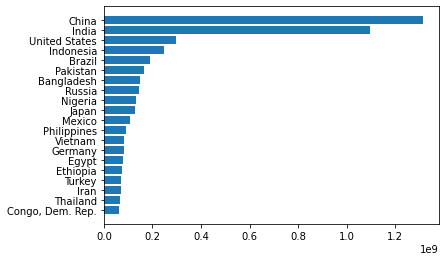

In [8]:
spd=dt.sort_values('Population')               # sortiramo tabelu po gustini naseljenosti i dodeljujemo je novoj tabeli
spd20=spd[-20:]                                # zbog preglednosti, pomoću slajsa, izdvajamo samo poslednjih 20 redova
plt.barh(spd20['Country'],spd20['Population']) # crtamo horizontalni stubični dijagram 

Други важан графикон за приказ расподеле података је хистограм. Он нам даје приказ броја држава по одређеним интервалима вредности за површину држава. Функција `.hist()` дели интервал од најмање до највеће вредности на десет једнаких под-интервала уколико не наведемо конкретан број као други аргумент функције. У овом примеру распон од 0 до 20 милиона km² (што задајемо са `range=(0,2e7)`) делимо на 20 једнаких интервала и пребројавамо колико држава има у сваком од њих. У првом интервалу, од 0 до 100 000 квадратних килoмeтара, има скоро 200 држава. И Србија је међу њима. Ретке су оне које имају површину већу од 300 000 km².

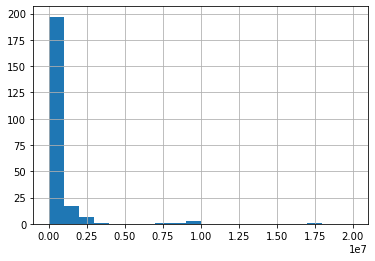

In [9]:
plt.hist(spd['Area'],20,range=(0,2e7))
plt.grid()                              # crtanje mreže na grafiku

### Филтрирање табеле

Филтрирање значи да од целе табеле желимо да издвојимо само оне редове који нас интересују. За филтрирање података у табели користимо критеријуме, односно логичке исказе као што је нпр. `dt['Continent']=="North America"`. Овде проверавамо које су вредности у колони `dt['Continent']` једнаке стрингу `"North America"`. У угласте заграде после назива табеле треба унети тражени критеријум. На тај начин од целе почетне табеле издвајамо само онај део табеле где је критеријум испуњен.

На пример, овако можемо да издвојимо само државе које се налазе у Северној Америци.

In [10]:
dt[dt['Continent']=="North America"]

,Country,Continent,Population,Area
22,Bermuda,North America,65773,53
36,Canada,North America,33098932,9984670
80,Greenland,North America,56361,2166086
174,St Pierre & Miquelon,North America,7026,242
214,United States,North America,298444215,9631420


Слично можемо да издвојимо све државе са мање од 20000 становника. Шта мислите колико их има?

In [11]:
dt[dt['Population']<20000]

,Country,Continent,Population,Area
6,Anguilla,South America,13477,102
140,Montserrat,South America,9439,102
144,Nauru,Oceania,13287,21
171,Saint Helena,Africa,7502,413
174,St Pierre & Miquelon,North America,7026,242
209,Tuvalu,Oceania,11810,26
221,Wallis and Futuna,Oceania,16025,274


## Статистички и графички приказ табеларних података

У табели типа _dataframe_ можемо да имамо различите типове података. Битно је само да су у једној колони сви подаци истог типа. Два најважнија типа података, заправо групе типова су номинални (или категоријални) и нумерички подаци. Номинални подаци означавају нека имена, називе или кратке текстуалне описе. Имена држава представљају номиналне податке. Са тим бројевима се ништа не рачуна. Већина номиналних података су стрингови који означавају различите објекте. Једина статистика коју можемо да радимо са номиналним подацима јесте да пребројимо колико их има, тј. да видимо колико се често појављују.

У табели `dt` имамо колону са именом континента на ком се држава налази. Ако бисмо пребројали колико се пута појављују ови подаци, видели бисмо колико држава имамо на ком континенту. Библиотека _pandas_ нам омогућава да то радимо помоћу функције `.value_counts()` коју применимо на одговарајућу колону.

In [12]:
vc=dt['Continent'].value_counts()
print(vc)

Africa           57
Asia             52
Europe           47
South America    45
Oceania          21
North America     5
Name: Continent, dtype: int64


Нумеричке вредности могу да се пореде међусобно по величини. Са бројевима могу да се раде и рачунске операције. Због тога су могућности за обраду и анализу нумеричких низова много веће него за номиналне. Наш основни задатак је да цео низ података што једноставније и разумљивије представимо. Низ података често поједностављено приказујемо помоћу карактеристичних вредности, као што је нпр. средња вредност. Други важан начин је да цео низ података прикажемо графички како бисмо податке могли да "видимо".  

### Описивање низова података преко карактеристичних вредности

За рачунање средње вредности се користи _pandas_ функција `.mean()` која се примењује на нумеричку колону у табели. Користећи табелу са подацима о државама израчунаћемо средњу вредност површина држава.

In [13]:
dt['Area'].mean()

598226.9559471365

Средња вредност површина свих држава је приближно 598 000 km². Толика би била површина сваке појединачне државе на свету када би територија била равномерно распоређена. Ми, међутим, знамо да постоје минијатурне државе са по неколико квадратних километра, док са друге стране имамо Русију са 17 милиона km². Колика је површина типичне државе на овој планети? То ће нам боље показати медијана него средња вредност.

> __Медијана__ је математичка функција која нам даје средишњу вредност за низ који је сортиран по величини. Она дели низ на два дела са истим бројем елемената. Ако низ, на пример, садржи висине 101 ученика, медијана нам даје висину 51. највишег ученика. Од њега има 50 виших и 50 нижих, док је он у самој средини. Ако имамо паран број ученика, онда нема ученика који је баш у средини па се медијана рачуна мало другачије: као средња вредност висине првог елемента испод и првог изнад те средине. То значи да је медијана низа од 100 бројева, средња вредност 50. и 51. највеће вредности овог низа. 

In [14]:
dt['Area'].median()

86600.0

Уочите колика је разлика између средње вредности и медијане за површине држава. Средња вредност је битно већа код свих низова података где има много малих и мало великих вредности. Слично бисмо добили и за број становника.

Погледајте хистограм површине по државама. Највише је оних малих које видимо као врло висок стубић са леве стране, док су са десне само појединачни случајеви врло ретких великих држава. Не улазећи даље у тумачење података, хоћемо само да покажемо колико средња вредност и медијана могу да се разликују. На графикону доле, црвеном линијом је обележена медијана, а наранџастом средња вредност. Пробајте сами да откријете шта ради која линија у програму.

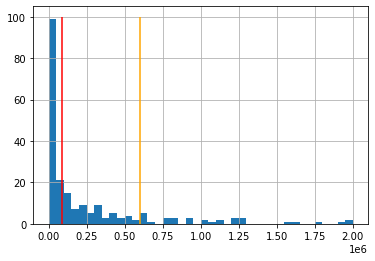

In [15]:
mArea=dt['Area'].mean()
mdArea=dt['Area'].median()
plt.hist(dt['Area'],40,range=(0,2e6))
plt.grid()
plt.vlines(mArea,0,100,colors='orange')
plt.vlines(mdArea,0,100,colors='red');

__Задатак 1__: Одредите средњу вредност и медијану за број становника држава света.

__Задатак 2__: Нацртајте хистограм броја становника по државама света. 

__Задатак 3__: Нацртајте хистограм броја становника по државама Европе. 